In [10]:
import numpy as np
import math
import torch
import matplotlib.pyplot as plt
from tme5 import CirclesData
from random import gauss 

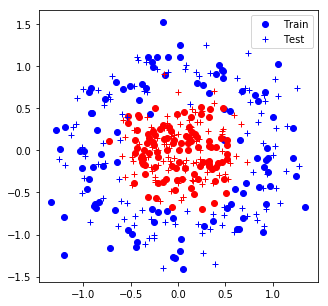

In [11]:
data = CirclesData()
Xtrain = data.Xtrain
Ytrain = data.Ytrain
data.plot_data() # affiche les points de train et test

In [66]:
def init_params(nx, nh, ny):
    params = {}

    params["Wh"] = torch.tensor(np.array([gauss(0,0.3) for i in range (nh*nx)]),requires_grad=True).reshape(nh,nx).type(torch.FloatTensor)
    params["Wy"] = torch.tensor(np.array([gauss(0,0.3) for i in range (nh*ny)]),requires_grad=True).reshape(ny,nh).type(torch.FloatTensor)
    params["bh"] = torch.tensor(np.array([gauss(0,0.3) for i in range (nh)]),requires_grad=True).type(torch.FloatTensor)
    params["by"] = torch.tensor(np.array([gauss(0,0.3) for i in range (ny)]),requires_grad=True).type(torch.FloatTensor)

    return params



In [67]:
def forward(params, X):
    outputs = {}
    batch = X.shape[0]
    Bh = params["bh"] 
    By = params["by"] 
    for i in range (batch-1): 
        Bh = torch.cat((Bh,params["bh"]))
        By = torch.cat((By,params["by"]))
    Bh = Bh.reshape((batch,len(params["bh"]))).t()
    By = By.reshape((batch,len(params["by"])))
    # TODO remplir avec les paramètres X, htilde, h, ytilde, yhat
    htilde = torch.mm(X,params["Wh"].t()).t() + Bh 
    h = torch.tanh(htilde).t()
    ytilde = torch.mm(h,params["Wy"].t())+By
    activationF = torch.nn.Softmax(dim=1)
    yhat = activationF(ytilde)
    outputs['yhat'] = yhat 
    outputs['ytilde'] = ytilde 
    outputs['htilde'] = htilde 
    outputs['h'] = h 
    
    return outputs['yhat'], outputs
    

In [91]:
def loss_accuracy(Yhat, Y):
    L = 0
    acc = 0
    _,indsY = torch.max(Y,1)
    _,indsYhat = torch.max(Yhat,1)
    nbequals, =torch.where(indsY == indsYhat)
    acc = nbequals.size()[0]/indsY.size()[0]
    for i,j in enumerate(indsY) : 
        L -= torch.log(Yhat[i][j])
    
    return L, acc

In [69]:
def sgd(params, eta):
    # TODO mettre à jour le contenu de params
    with torch.no_grad():
        params["Wh"] -= eta * params["Wh"].grad
        params["Wy"] -= eta * params["Wy"].grad
        params["by"] -= eta * params["by"].grad
        params["bh"] -= eta * params["bh"].grad 
        params["Wh"].grad.zero_()
        params["Wy"].grad.zero_()
        params["bh"].grad.zero_()
        params["by"].grad.zero_()
    
    return params

tensor([[9.9996e-01, 4.0604e-05],
        [9.9996e-01, 3.5037e-05],
        [9.9995e-01, 4.9967e-05],
        [9.9997e-01, 3.3493e-05],
        [9.9994e-01, 5.5633e-05],
        [9.9995e-01, 4.9081e-05],
        [9.9996e-01, 4.0068e-05],
        [9.9993e-01, 6.9928e-05],
        [9.9993e-01, 6.5383e-05],
        [9.9997e-01, 2.9664e-05],
        [9.9995e-01, 5.0165e-05],
        [9.9995e-01, 5.2529e-05],
        [9.9996e-01, 3.8998e-05],
        [9.9996e-01, 4.2034e-05],
        [9.9991e-01, 9.2467e-05],
        [9.9993e-01, 6.8527e-05],
        [9.9995e-01, 4.9869e-05],
        [9.9992e-01, 7.5799e-05],
        [9.9992e-01, 7.5814e-05],
        [9.9992e-01, 8.2395e-05],
        [9.9948e-01, 5.2154e-04],
        [9.9975e-01, 2.5167e-04],
        [9.9979e-01, 2.0813e-04],
        [9.9966e-01, 3.3763e-04],
        [9.9946e-01, 5.3840e-04],
        [9.9802e-01, 1.9830e-03],
        [9.9970e-01, 3.0374e-04],
        [9.9958e-01, 4.2448e-04],
        [9.9642e-01, 3.5811e-03],
        [9.988

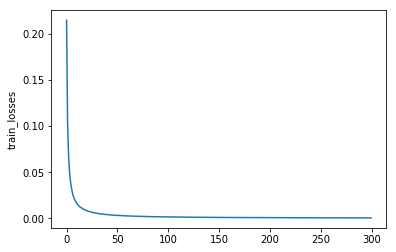

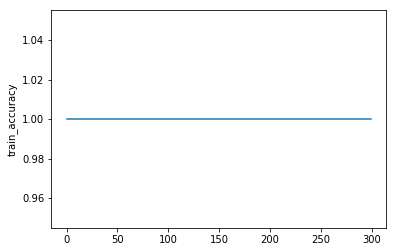

In [89]:
if __name__ == '__main__':
    # init
    data = CirclesData()
    #data.plot_data()
    N = data.Xtrain.shape[0]
    Nbatch = 10
    nx = data.Xtrain.shape[1]
    nh = 10
    ny = data.Ytrain.shape[1]
    eta = 0.03
    data.Xtrain.requires_grad = True
    data.Ytrain.requires_grad = True
    params = init_params(nx, nh, ny)
    Nepoch = 300 
    train_losses = []
    train_accuracy = []
    for i in range(Nepoch): 
        for j in range (int(N/Nbatch)):
            ind = np.random.randint(0,data.Xtrain.shape[1],Nbatch) 
            Xbatch = data.Xtrain[ind]
            Ybatch = data.Ytrain[ind]
            Yhat, outputs = forward(params, Xbatch)
            L, acc = loss_accuracy(Yhat, Ybatch)
            for param in params.keys() : 
                params[param].retain_grad()
            L.backward()
            params = sgd(params,eta)
        
        train_losses.append(L.item())
        train_accuracy.append(acc)
    
    ypred,_ = forward(params, data.Xtest)
    print(ypred)
    loss,acc = loss_accuracy(ypred, data.Ytest)
    print("Loss in test: ",loss.item())
    print("Accuracy in test:",acc)  
    plt.plot(np.arange(Nepoch),train_losses)
    plt.ylabel('train_losses')
    plt.show() 
    plt.plot(np.arange(Nepoch),train_accuracy)
    plt.ylabel('train_accuracy')
    plt.show()
    

    

In [90]:
data.Ytest

tensor([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1